In [2]:
import torch
from torchvision import datasets, transforms
import helper

Downloading the data!

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

This is how ine of the images look like:

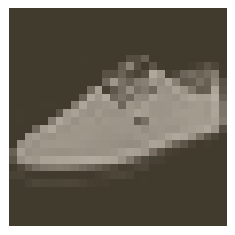

In [4]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

### Building the network:

In [5]:
from torch import nn, optim
import torch.nn.functional as F

In [6]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

### Training the network:

In [9]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [10]:
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5192397573291619
Training loss: 0.3895883765508498
Training loss: 0.3557952935380468
Training loss: 0.32992290298758287
Training loss: 0.31435265414305585
Training loss: 0.3029213010200432
Training loss: 0.2937162280765805
Training loss: 0.28289752961523623
Training loss: 0.27668318491595895
Training loss: 0.26561224829159313


### Testing the network:

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper

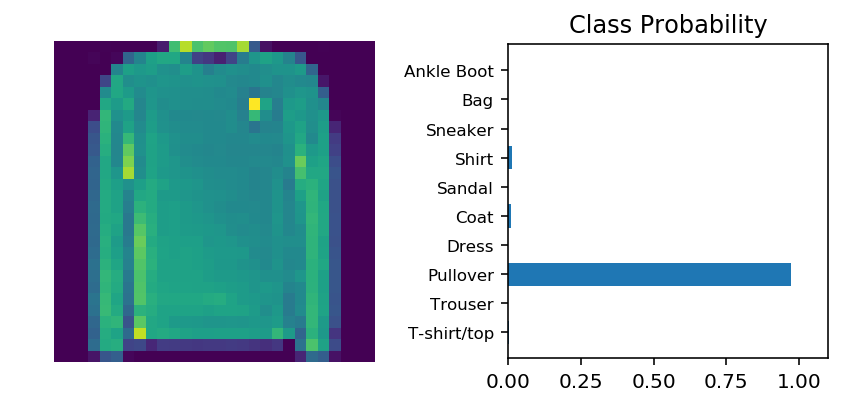

In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')

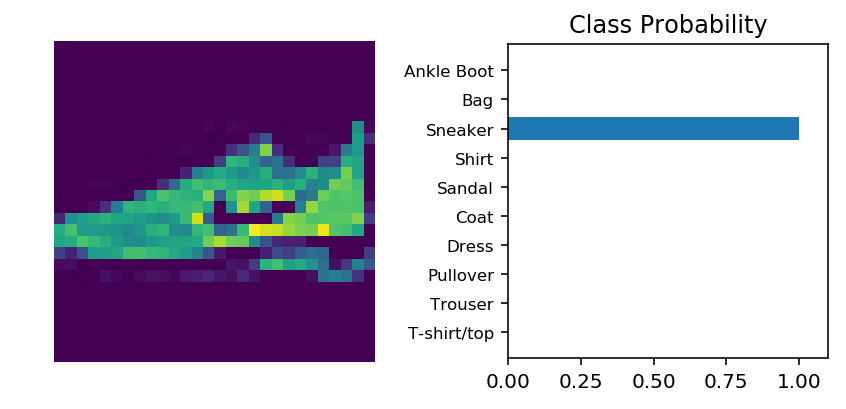

In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')

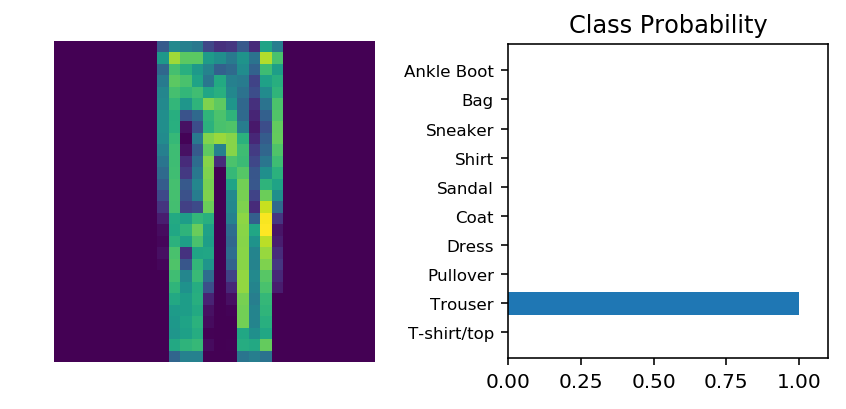

In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()

img = images[1]

ps = torch.exp(model(img))
helper.view_classify(img, ps, version='Fashion')

In [15]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
          
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.519..  Test Loss: 0.441..  Test Accuracy: 0.841
Epoch: 2/30..  Training Loss: 0.389..  Test Loss: 0.409..  Test Accuracy: 0.851
Epoch: 3/30..  Training Loss: 0.354..  Test Loss: 0.399..  Test Accuracy: 0.851
Epoch: 4/30..  Training Loss: 0.332..  Test Loss: 0.401..  Test Accuracy: 0.860
Epoch: 5/30..  Training Loss: 0.317..  Test Loss: 0.405..  Test Accuracy: 0.860
Epoch: 6/30..  Training Loss: 0.306..  Test Loss: 0.395..  Test Accuracy: 0.861
Epoch: 7/30..  Training Loss: 0.291..  Test Loss: 0.377..  Test Accuracy: 0.869
Epoch: 8/30..  Training Loss: 0.284..  Test Loss: 0.370..  Test Accuracy: 0.870
Epoch: 9/30..  Training Loss: 0.274..  Test Loss: 0.366..  Test Accuracy: 0.872
Epoch: 10/30..  Training Loss: 0.271..  Test Loss: 0.395..  Test Accuracy: 0.863
Epoch: 11/30..  Training Loss: 0.259..  Test Loss: 0.411..  Test Accuracy: 0.870
Epoch: 12/30..  Training Loss: 0.254..  Test Loss: 0.372..  Test Accuracy: 0.876
Epoch: 13/30..  Training Loss: 0.248.

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt


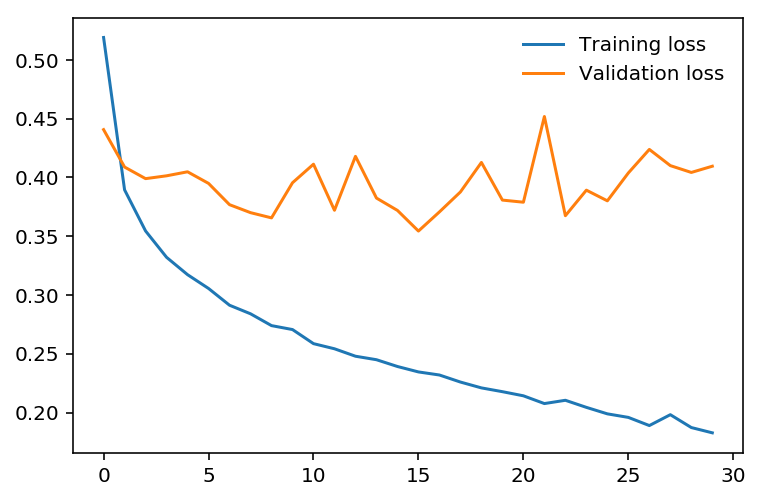

In [17]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

If we look at the training and validation losses as we train the network, we can see a phenomenon known as overfitting. The network learns the training set better and better, resulting in lower training losses. However, it starts having problems generalizing to data outside the training set leading to the validation loss increasing. The ultimate goal of any deep learning model is to make predictions on new data, so we should strive to get the lowest validation loss possible.